In [86]:
import pandas as pd
import numpy as np

In [9]:
df = pd.read_parquet('../data/FE021/FE021-train-1JHC.parquet')

In [3]:
from fastai.tabular import *

In [10]:
train = pd.read_csv('../input/train.csv')

In [20]:
type_train = train.loc[train['type'] == '1JHC'].reset_index(drop=True)
df = pd.concat([df, type_train], axis=1)

In [21]:
procs = [FillMissing, Categorify, Normalize]
valid_idx = range(len(df)-20000, len(df))

dep_var = 'scalar_coupling_constant'

In [22]:
FEATURES = [x for x in df.columns if x not in ['id','molecule_name','atom_index_0',
                                               'atom_index_1','type',
                                               'scalar_coupling_constant','molecule_name.1'] + CAT_FEATURES]

In [24]:
path = './'
data = TabularDataBunch.from_df(path,
                                df[FEATURES+[dep_var]],
                                dep_var,
                                #cat_names=CAT_FEATURES,
                                valid_idx=valid_idx,
                                bs=5000,
                                procs=procs)

In [25]:
(cat_x,cont_x),y = next(iter(data.train_dl))
for o in (cat_x, cont_x, y): print(to_np(o[:5]))

[[1 1 1 1 ... 1 1 1 1]
 [2 2 2 1 ... 1 1 1 1]
 [2 1 1 1 ... 1 1 1 1]
 [2 2 2 1 ... 1 1 1 1]
 [2 2 2 1 ... 1 1 1 1]]
[[ 1.137135  1.302314 -0.200206 -0.004172 ... -1.208708  0.049521 -0.391194  1.358493]
 [-0.491323 -0.262811  0.354062 -0.004172 ...  0.815364  1.065458  0.560014  0.145516]
 [ 0.492237  1.378552 -1.398049 -0.004172 ...  0.088218  1.61984   1.324589  1.230697]
 [-0.73139  -0.872717  0.194003 -0.004172 ...  1.288699  0.174994  0.313265 -0.759884]
 [-0.755753 -0.103608  1.906417 -0.004172 ...  0.905173 -0.360715 -1.193644  0.743341]]
[83.6601 89.4431 86.4193 85.0655 86.8221]


In [26]:
# !export CUDA_VISIBLE_DEVICES=0

In [27]:
# !export CUDA_DEVICE_ORDER=PCI_BUS_ID

In [28]:
# import torch
# print(torch.cuda.is_available())

In [29]:
layers = [10,
          1024,
          256,
          128,
         ]
learn = tabular_learner(data, layers=layers, metrics=mean_absolute_error)

In [31]:
learn.fit_one_cycle(1, 1e-4)

epoch,train_loss,valid_loss,mean_absolute_error,time
0,9230.111328,10748.410156,101.789185,00:56


In [32]:
learn.unfreeze()

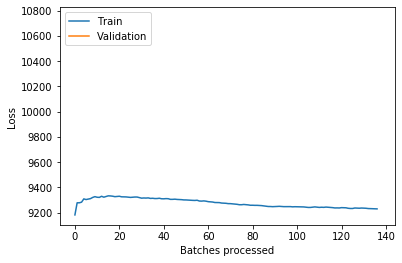

In [36]:
learn.recorder.plot_losses()

In [37]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


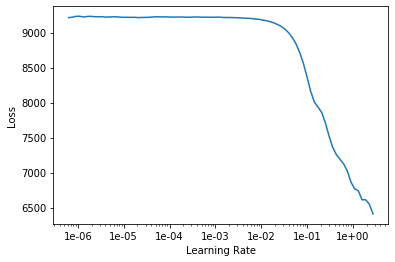

In [38]:
learn.recorder.plot()

In [39]:
learn.fit_one_cycle(1, 1e-1)

epoch,train_loss,valid_loss,mean_absolute_error,time
0,355.303497,8.058635,2.024680,00:57


In [40]:
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,mean_absolute_error,time
0,4.817960,7.109797,1.918145,00:56


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


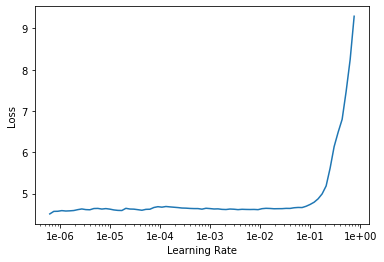

In [41]:
learn.lr_find()
learn.recorder.plot()

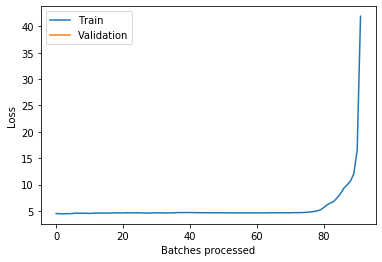

In [42]:
learn.recorder.plot_losses()

In [43]:
learn.fit_one_cycle(1, 1e-4)

epoch,train_loss,valid_loss,mean_absolute_error,time
0,4.678605,7.409723,1.944778,00:57


In [44]:
learn.fit_one_cycle(5, 1e-4)

epoch,train_loss,valid_loss,mean_absolute_error,time
0,4.724763,7.091312,1.909696,00:57
1,4.623997,7.142998,1.911681,00:56
2,4.724978,7.019900,1.904469,00:56
3,4.704129,7.194825,1.917246,00:56
4,4.622065,7.122698,1.908075,00:57


# Cont Names

In [45]:
procs = [FillMissing, Categorify, Normalize]

path = './'
data = TabularDataBunch.from_df(path,
                                df[FEATURES+[dep_var]],
                                dep_var,
                                cont_names=FEATURES,
                                valid_idx=valid_idx,
                                bs=5000,
                                procs=procs)

In [ ]:
layers = [10,
          1024,
          256,
          128,
         ]

In [46]:
learn = tabular_learner(data, layers=layers, metrics=mean_absolute_error)

In [47]:
learn.fit_one_cycle(1, 1e-4)

epoch,train_loss,valid_loss,mean_absolute_error,time
0,9198.522461,10651.248047,101.352936,00:58


In [48]:
learn.fit_one_cycle(1, 1e-4)

epoch,train_loss,valid_loss,mean_absolute_error,time
0,9164.927734,10597.460938,101.265259,00:58


In [49]:
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,mean_absolute_error,time
0,930.306519,7.516014,1.953028,00:58


In [50]:
learn.fit_one_cycle(1, 1e-3)

epoch,train_loss,valid_loss,mean_absolute_error,time
0,4.341606,6.018498,1.727920,00:58


# From Kernel
https://www.kaggle.com/rakibilly/fastai-tabular-starter

In [52]:
df.head()

,10th_closest_to_1_valence_x_cube_inv_dist,12th_closest_to_1_valence,13th_closest_to_1_exact_mass,17th_closest_to_0_spin_multiplicity,17th_closest_to_0_valence,17th_closest_to_0_valence_x_cube_inv_dist,17th_closest_to_1_spin_multiplicity,18th_closest_to_0_exact_mass,19th_closest_to_0_spin_multiplicity,19th_closest_to_1_spin_multiplicity_x_cube_inv_dist,...,yukawa_H.x,yukawa_H.y,yukawa_N.x,yukawa_O.y,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.504328,1.342247,0.000000,0.0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.504327,1.342247,0.000000,0.0,4,dsgdb9nsd_000001,2,0,1JHC,84.8074
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.504323,1.342247,0.000000,0.0,7,dsgdb9nsd_000001,3,0,1JHC,84.8093
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.504323,1.342247,0.000000,0.0,9,dsgdb9nsd_000001,4,0,1JHC,84.8095
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.344177,0.108789,0.0,17,dsgdb9nsd_000005,2,0,1JHC,171.2200


In [53]:
# df = pd.read_parquet('../data/FE021/FE021-train-1JHC.parquet')
te = pd.read_parquet('../data/FE021/FE021-test-1JHC.parquet')

In [67]:
# idx = np.random.randint(0, len(df), size=np.int(.2*len(df)))

In [63]:
valid_ids = np.load('../folds/3FOLD-1JHC-fold0-valid_ids.npy')

In [ ]:
type_train = train.loc[train['type'] == '1JHC'].reset_index(drop=True)
df = pd.concat([df, type_train], axis=1)

In [66]:
valid_idx = df.loc[df['id'].isin(valid_ids)].index.tolist()

In [70]:
FEATURES = [x for x in df.columns if x not in ['id','molecule_name','atom_index_0',
                                               'atom_index_1','type',
                                               'scalar_coupling_constant','molecule_name.1','sd_molecule_atom_0_dist_xyz'] + CAT_FEATURES]

In [73]:
np.random.seed(529)
bs = 4096
procs = [FillMissing, Categorify, Normalize]
data = (TabularList.from_df(df,
                            cont_names=FEATURES, 
                            procs=procs)
                           .split_by_idx(valid_idx)
                           .label_from_df(cols=dep_var)
                           .add_test(TabularList.from_df(te, 
                                                         cont_names=FEATURES))
                           .databunch(bs=bs))

In [74]:
data.show_batch(rows=5)

10th_closest_to_1_valence_x_cube_inv_dist_na,12th_closest_to_1_valence_na,13th_closest_to_1_exact_mass_na,17th_closest_to_0_spin_multiplicity_na,17th_closest_to_0_valence_na,17th_closest_to_0_valence_x_cube_inv_dist_na,17th_closest_to_1_spin_multiplicity_na,18th_closest_to_0_exact_mass_na,19th_closest_to_0_spin_multiplicity_na,19th_closest_to_1_spin_multiplicity_x_cube_inv_dist_na,20th_closest_to_0_spin_multiplicity_na,20th_closest_to_0_spin_multiplicity_x_cube_inv_dist_na,21st_closest_to_0_spin_multiplicity_na,22nd_closest_to_1_spin_multiplicity_na,22nd_closest_to_1_spin_multiplicity_x_cube_inv_dist_na,24th_closest_to_1_spin_multiplicity_na,24th_closest_to_1_spin_multiplicity_x_cube_inv_dist_na,25th_closest_to_0_spin_multiplicity_x_cube_inv_dist_na,26th_closest_to_0_spin_multiplicity_x_cube_inv_dist_na,3rd_closest_to_0_exact_mass_na,3rd_closest_to_0_valence_na,3rd_closest_to_0_valence_x_cube_inv_dist_na,3rd_closest_to_1_na,3rd_closest_to_1_exact_mass_na,3rd_closest_to_1_valence_x_cube_inv_dist_na,4th_closest_to_0_exact_mass_na,4th_closest_to_0_valence_na,4th_closest_to_0_valence_x_cube_inv_dist_na,4th_closest_to_1_exact_mass_na,4th_closest_to_1_valence_na,4th_closest_to_1_valence_x_cube_inv_dist_na,5th_closest_to_0_na,5th_closest_to_0_exact_mass_na,5th_closest_to_0_valence_na,5th_closest_to_0_valence_x_cube_inv_dist_na,5th_closest_to_1_na,5th_closest_to_1_exact_mass_na,5th_closest_to_1_valence_na,5th_closest_to_1_valence_x_cube_inv_dist_na,6th_closest_to_0_exact_mass_na,6th_closest_to_0_valence_na,6th_closest_to_0_valence_x_cube_inv_dist_na,6th_closest_to_1_exact_mass_na,6th_closest_to_1_valence_x_cube_inv_dist_na,7th_closest_to_0_exact_mass_na,7th_closest_to_0_valence_x_cube_inv_dist_na,7th_closest_to_1_exact_mass_na,7th_closest_to_1_valence_x_cube_inv_dist_na,8th_closest_to_0_valence_na,8th_closest_to_0_valence_x_cube_inv_dist_na,8th_closest_to_1_valence_x_cube_inv_dist_na,9th_closest_to_0_exact_mass_na,9th_closest_to_0_valence_na,9th_closest_to_0_valence_x_cube_inv_dist_na,9th_closest_to_1_valence_x_cube_inv_dist_na,adC1_na,adC2_na,adC3_na,adC4_na,adH1_na,adH2_na,adN1_na,adN2_na,angle_0_10th1_1_na,angle_0_11th1_1_na,angle_0_1_3rd1_na,angle_0_1_4th1_na,angle_0_1_5th1_na,angle_0_3rd0_1_na,angle_0_3rd1_1_na,angle_0_4th0_1_na,angle_0_4th1_1_na,angle_0_5th0_1_na,angle_0_5th1_1_na,angle_0_6th0_1_na,angle_0_6th1_1_na,angle_0_7th0_1_na,angle_0_7th1_1_na,angle_0_8th0_1_na,angle_0_8th1_1_na,angle_0_9th1_1_na,angle_1_0_10th0_na,angle_1_0_10th1_na,angle_1_0_11th0_na,angle_1_0_11th1_na,angle_1_0_3rd0_na,angle_1_0_4th0_na,angle_1_0_5th0_na,angle_1_0_6th0_na,angle_1_0_6th1_na,angle_1_0_7th0_na,angle_1_0_7th1_na,angle_1_0_8th0_na,angle_1_0_8th1_na,angle_1_0_9th0_na,angle_1_0_9th1_na,distance_10th_closest_to_0_na,distance_10th_closest_to_0_cube_inverse_na,distance_10th_closest_to_1_na,distance_10th_closest_to_1_cube_inverse_na,distance_12th_closest_to_0_cube_inverse_na,distance_12th_closest_to_1_na,distance_12th_closest_to_1_cube_inverse_na,distance_13th_closest_to_1_cube_inverse_na,distance_14th_closest_to_1_cube_inverse_na,distance_17th_closest_to_1_na,distance_22nd_closest_to_1_na,distance_3rd_closest_to_0_na,distance_3rd_closest_to_0_cube_inverse_na,distance_3rd_closest_to_1_na,distance_3rd_closest_to_1_cube_inverse_na,distance_4th_closest_to_0_na,distance_4th_closest_to_0_cube_inverse_na,distance_4th_closest_to_1_na,distance_4th_closest_to_1_cube_inverse_na,distance_5th_closest_to_0_na,distance_5th_closest_to_0_cube_inverse_na,distance_5th_closest_to_1_na,distance_5th_closest_to_1_cube_inverse_na,distance_6th_closest_to_0_na,distance_6th_closest_to_0_cube_inverse_na,distance_6th_closest_to_1_na,distance_6th_closest_to_1_cube_inverse_na,distance_7th_closest_to_0_na,distance_7th_closest_to_0_cube_inverse_na,distance_7th_closest_to_1_na,distance_7th_closest_to_1_cube_inverse_na,distance_8th_closest_to_0_na,distance_8th_closest_to_0_cube_inverse_na,distance_8th_closest_to_1_na,distance_8th_closest_to_1_cube_inverse_na,distance_9th_closest

In [75]:
def mean_absolute_error_fastai(pred:Tensor, targ:Tensor)->Rank0Tensor:
    "Mean absolute error between `pred` and `targ`."
    pred,targ = flatten_check(pred,targ)
    return F.l1_loss(pred, targ)

In [76]:
learn = tabular_learner(data, 
                        layers=[1000,500,100], 
                        emb_drop=0.04,
                        ps=(0.001, 0.01, 0.1),
                        metrics=[mean_absolute_error_fastai, rmse], 
                        wd=1e-2).to_fp16()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


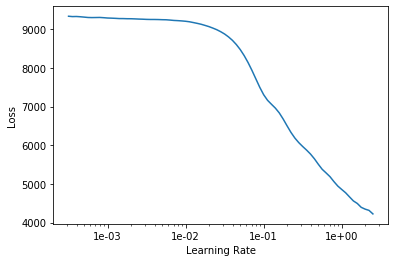

In [77]:
lr_find(learn, start_lr=1e-4, end_lr=10, num_it=100) #, start_lr=1e-2, end_lr=10, num_it=200
learn.recorder.plot()

In [78]:
lr = 2e-3
learn.fit_one_cycle(1, lr, wd=0.9)

epoch,train_loss,valid_loss,mean_absolute_error_fastai,root_mean_squared_error,time
0,8758.410156,8738.320312,93.112404,93.454704,00:49


In [79]:
learn.fit_one_cycle(1, lr/4, wd=0.8)

epoch,train_loss,valid_loss,mean_absolute_error_fastai,root_mean_squared_error,time
0,8433.419922,8394.062500,91.431190,91.606987,00:49


In [80]:
lr = 1e-2
learn.fit_one_cycle(1, lr, wd=0.9)

epoch,train_loss,valid_loss,mean_absolute_error_fastai,root_mean_squared_error,time
0,4235.044922,3024.336914,54.963379,54.993725,00:49


In [81]:
learn.fit_one_cycle(3, lr/10, wd=0.8)

epoch,train_loss,valid_loss,mean_absolute_error_fastai,root_mean_squared_error,time
0,2841.457764,2566.229248,50.625481,50.657764,00:50
1,2305.603271,2153.835205,46.361225,46.408882,00:50
2,2057.454834,2017.356689,44.888081,44.914932,00:50


In [82]:
learn.fit_one_cycle(1, lr/10, wd=0.8)

epoch,train_loss,valid_loss,mean_absolute_error_fastai,root_mean_squared_error,time
0,1790.539917,1722.695435,41.481777,41.505302,00:49


In [83]:
learn.fit_one_cycle(3, lr/20, wd=0.9)


epoch,train_loss,valid_loss,mean_absolute_error_fastai,root_mean_squared_error,time
0,1663.825684,1560.101074,39.367641,39.490665,00:49
1,1498.481934,1398.367310,37.367310,37.394539,00:49
2,1417.206909,1397.703003,37.363842,37.385815,00:49


In [84]:
learn.fit_one_cycle(3, lr/40, wd=0.8)


epoch,train_loss,valid_loss,mean_absolute_error_fastai,root_mean_squared_error,time
0,1367.885864,1267.772217,35.580547,35.605602,00:50
1,1275.688599,1234.460083,35.111481,35.134762,00:51
2,1227.797852,1212.628174,34.795994,34.822735,00:50


In [85]:
learn.fit_one_cycle(3, 1e-4)


epoch,train_loss,valid_loss,mean_absolute_error_fastai,root_mean_squared_error,time
0,1187.402588,1134.170166,33.654301,33.677395,00:49
1,1096.535889,1059.547607,32.527531,32.550632,00:50
2,1050.636230,1038.690308,32.205479,32.228676,00:49


In [87]:
learn.fit_one_cycle(3, 1e-2)

epoch,train_loss,valid_loss,mean_absolute_error_fastai,root_mean_squared_error,time
0,166.612030,21.088171,3.677112,4.533686,00:48
1,27.400574,3.188735,1.395302,1.777200,00:49
2,14.247722,1.843789,0.972985,1.344265,00:50


In [88]:
learn.fit_one_cycle(3, 1e-2/10, wd=0.8)

epoch,train_loss,valid_loss,mean_absolute_error_fastai,root_mean_squared_error,time
0,12.842007,3.399021,1.304960,1.825887,00:51
1,12.693254,2.119473,1.062316,1.442797,00:50
2,12.567470,1.816567,0.990357,1.336409,00:51


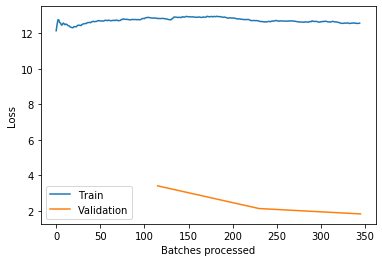

In [89]:
learn.recorder.plot_losses()

In [90]:
learn.fit_one_cycle(3, 1e-2/2, wd=0.8)

epoch,train_loss,valid_loss,mean_absolute_error_fastai,root_mean_squared_error,time
0,13.564358,8.398241,2.278867,2.882467,00:50
1,13.453123,5.728518,1.809968,2.377935,00:49
2,12.731028,2.115937,1.088381,1.441880,00:50


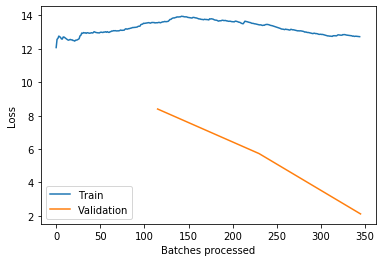

In [91]:
learn.recorder.plot_losses()

In [93]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


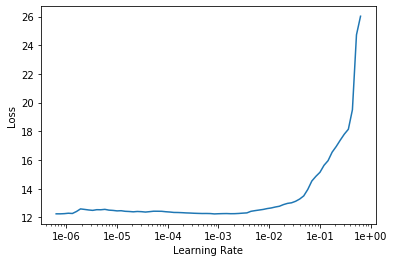

In [94]:
learn.recorder.plot()

In [95]:
learn.fit_one_cycle(1, 5e-5, wd=0.8)

epoch,train_loss,valid_loss,mean_absolute_error_fastai,root_mean_squared_error,time
0,12.411717,1.876968,1.026770,1.361238,00:50


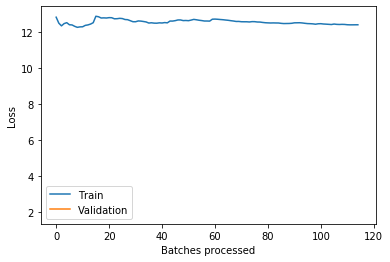

In [96]:
learn.recorder.plot_losses()

In [98]:
lr = 5e-5
learn.fit_one_cycle(10, 5e-5, wd=0.8)

epoch,train_loss,valid_loss,mean_absolute_error_fastai,root_mean_squared_error,time
0,12.334525,2.042238,1.069713,1.417987,00:49
1,12.377757,1.880428,1.028357,1.361358,00:50
2,12.356701,2.176654,1.061033,1.443034,00:51
3,12.345288,1.734866,0.987848,1.308161,00:50
4,12.171175,1.704446,0.951290,1.292359,00:51
5,12.230183,1.636360,0.933252,1.265545,00:51
6,12.202000,1.725125,0.979076,1.304486,00:49
7,12.114690,1.641011,0.942230,1.270448,00:51
8,12.164005,1.775846,0.993589,1.323197,00:50
9,12.137898,1.748627,0.983460,1.312286,00:51


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


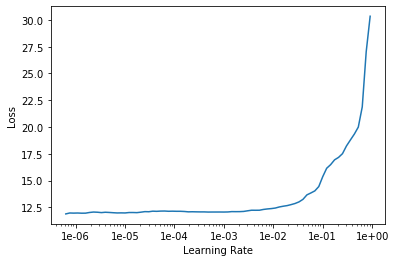

In [99]:
learn.lr_find()
learn.recorder.plot()

In [100]:
learn.fit_one_cycle(3, 5e-4, wd=0.8)

epoch,train_loss,valid_loss,mean_absolute_error_fastai,root_mean_squared_error,time
0,12.306372,1.870466,0.983940,1.352980,00:49
1,12.229877,1.701541,0.934540,1.288418,00:49
2,12.070015,1.556441,0.919188,1.236863,00:50


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


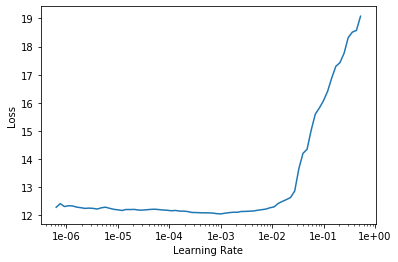

In [101]:
learn.lr_find()
learn.recorder.plot()

In [102]:
learn.fit_one_cycle(5, 1e-6, wd=0.8)

epoch,train_loss,valid_loss,mean_absolute_error_fastai,root_mean_squared_error,time
0,12.062298,1.600251,0.939609,1.254528,00:50
1,11.948273,1.680020,0.953702,1.283153,00:48
2,12.125814,1.724284,0.973178,1.301614,00:49
3,12.018521,1.507149,0.911428,1.217620,00:50
4,12.100590,1.710833,0.974122,1.296917,00:50


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


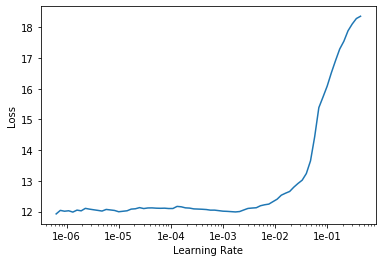

In [103]:
learn.lr_find()
learn.recorder.plot()

In [105]:
learn.fit_one_cycle(40, slice(1e-4), wd=0.8)

epoch,train_loss,valid_loss,mean_absolute_error_fastai,root_mean_squared_error,time
0,12.039928,1.664765,0.964233,1.280081,00:51
1,12.059234,1.527397,0.907058,1.225014,00:51
2,12.094468,1.559045,0.904782,1.234749,00:50
3,12.045070,1.561254,0.912563,1.237320,00:49
4,12.031842,1.455707,0.878514,1.194479,00:50
5,12.088267,1.663874,0.956437,1.279755,00:51
6,11.984251,1.518332,0.900172,1.220006,00:50
7,12.069550,1.610984,0.927765,1.255713,00:50
8,11.972672,1.724025,0.971772,1.300177,00:50
9,11.979508,1.396981,0.841907,1.165804,00:49


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


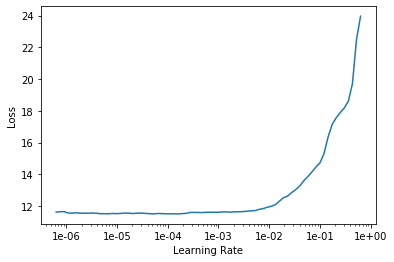

In [106]:
learn.lr_find()
learn.recorder.plot()

In [107]:
learn.fit_one_cycle(40, slice(5e-3), wd=0.8)

epoch,train_loss,valid_loss,mean_absolute_error_fastai,root_mean_squared_error,time
0,11.962044,2.673460,0.883690,1.335134,00:49
1,12.098583,1.939711,1.013002,1.376741,00:50
2,12.257137,2.335809,1.102050,1.503795,00:51
3,12.450222,2.279420,1.101690,1.494761,00:49
4,12.742209,4.964416,1.579487,2.196488,00:50
5,13.064356,4.048150,1.550707,1.983767,00:50
6,13.358884,4.555264,1.523250,2.110221,00:51


KeyboardInterrupt: 

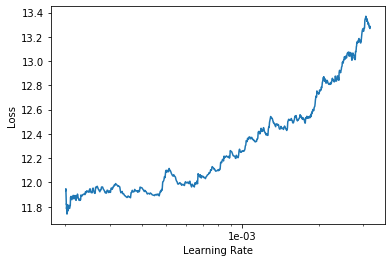

In [109]:
learn.recorder.plot()

In [110]:
learn.fit_one_cycle(5, 1e-5, wd=0.8)

epoch,train_loss,valid_loss,mean_absolute_error_fastai,root_mean_squared_error,time
0,13.795568,5.688203,1.398836,2.024649,00:49
1,13.180361,2.619514,1.222935,1.606774,00:50
2,12.974478,2.570578,1.188461,1.586285,00:49
3,12.798989,2.397558,1.162710,1.537531,00:49
4,12.840368,5.763532,1.238232,1.828142,00:51


In [111]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


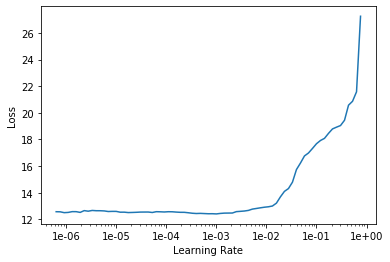

In [112]:
learn.recorder.plot()